In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


In [2]:
df = (pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/train.csv')
        .drop(columns='subject'))

df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [3]:
print(df.shape)


(7352, 562)


In [4]:
df["Activity"].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop('Activity', axis=1)
y = df['Activity']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
y

array([2, 2, 2, ..., 5, 5, 5])

In [7]:
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


In [8]:
# Initialize and train logistic regression model
model = LogisticRegression(max_iter=100000)  # Increase max_iter if it doesn't converge
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9809653297076818


<h1>1. Removing Duplicate Columns</h1>

In [9]:
# functions that removes the duplicated columns

def remove_duplicated_columns(df):
    
    df_transposed = df.T
    df_transposed = df_transposed.drop_duplicates()

    df_deduplicated = df_transposed.T


    return df_deduplicated 

In [10]:
#removed duplicated columns
X_train = remove_duplicated_columns(X_train)
X_test = remove_duplicated_columns(X_test)

In [11]:
 X_train = X_train.reset_index(drop= "True")
 X_test = X_test.reset_index(drop= "True")

In [12]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.278007,-0.017803,-0.108965,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,...,0.394506,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,0.237617,-0.000782,-0.114476,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,...,0.052089,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,0.290924,-0.050878,-0.073518,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,...,-0.038923,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,0.275268,-0.015050,-0.114204,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,...,-0.145084,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,0.278790,-0.018585,-0.106908,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,...,0.096524,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577


<h1>2. Variance Threshold</h1>

In [13]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05) #make sure the data is scaled

In [14]:
 sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [15]:
sum(sel.get_support())  #total number of columns that is above the varaince threshold

349

In [16]:
columns = X_train.columns[sel.get_support()]
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=349)

In [17]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [18]:
print(X_train.shape)
print(X_test.shape)

(5881, 349)
(1471, 349)


In [19]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,-0.577031,-0.813863,0.846922,...,0.394506,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,0.085617,-0.411806,0.271334,...,0.052089,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,-0.072309,0.200747,0.118277,...,-0.038923,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,-0.524676,-0.807362,0.825370,...,-0.145084,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,-0.564033,-0.810993,0.853330,...,0.096524,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577


<h1>3. Correlation</h1>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

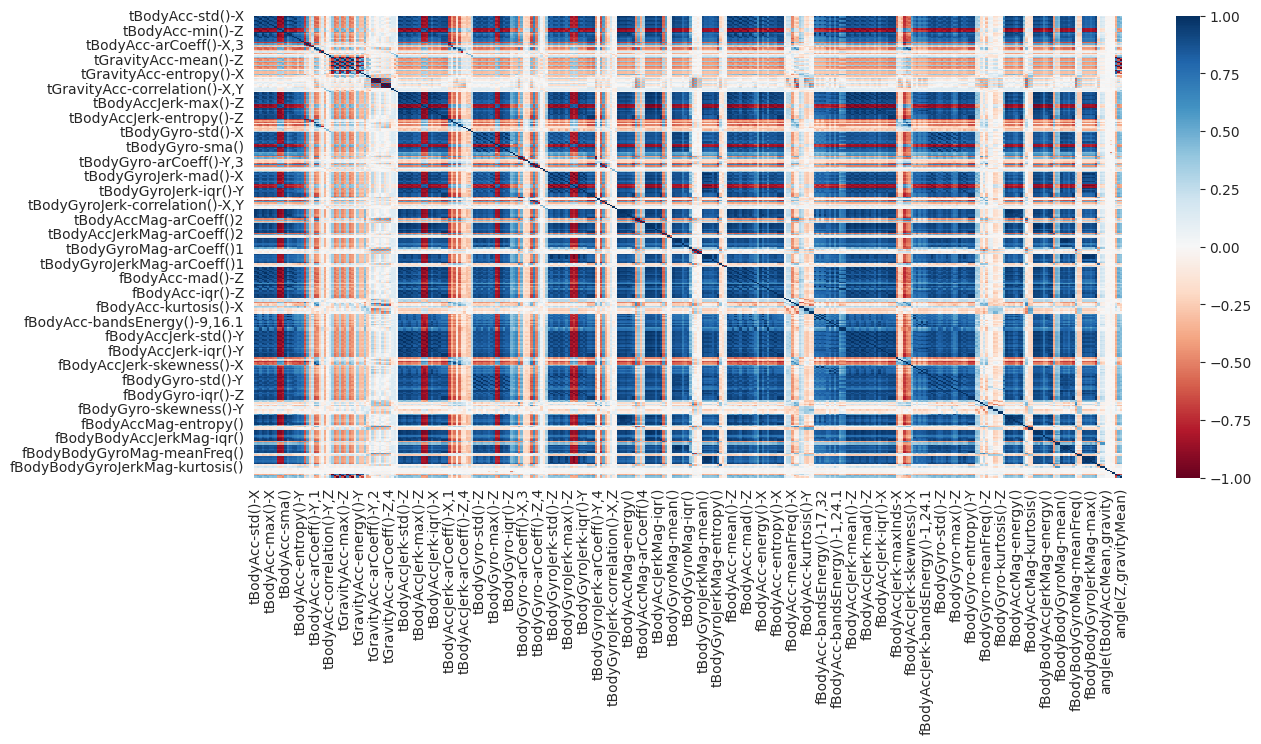

In [21]:
plt.figure(figsize=(14,6))
sns.heatmap(X_train.corr(), vmin = -1, vmax=1, cmap = "RdBu");

In [22]:
#cutoff threshold -0.3 - 0.3
corr_matrix = X_train.corr()
corr_matrix 

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,-0.061190,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,-0.103492,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,-0.095347,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,-0.055098,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,-0.101235,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.023914,-0.002241,-0.010535,0.024098,-0.005865,-0.014838,0.029230,-0.000207,-0.023622,-0.008700,...,-0.024274,0.031310,0.021829,-0.006297,0.013870,1.000000,-0.104987,-0.009878,-0.006218,-0.011178
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.000472,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,0.077000,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,-0.093215,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205


In [23]:
def drop_correlated_features(X_train, threshold=0.95):
    # Calculate correlation matrix
    corr_matrix = X_train.corr().abs()
    
    # Find columns to drop
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                to_drop.add(corr_matrix.columns[j])
    
    # Drop columns
    return X_train.drop(columns=to_drop)

In [24]:
X_train = drop_correlated_features(X_train, threshold=0.95)

# Apply the SAME column selection to test data
X_test = X_test[X_train.columns]


In [25]:
print(X_train.shape)
print(X_test.shape)

(5881, 137)
(1471, 137)


In [26]:
X_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2",...,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846423,-0.611174,-0.768785,-0.663066,0.145170,0.004176,...,0.132640,-0.690000,-0.024257,0.043182,0.394506,-0.684497,0.751089,0.626432,0.263401,-0.646225
1,-0.326331,0.069663,-0.224321,-0.411806,0.269204,0.403663,0.180054,0.176069,-0.484036,0.392201,...,0.144767,-0.316666,0.191186,-0.225796,0.052089,-0.131946,0.628099,-0.357089,-0.925512,0.110212
2,-0.026220,-0.032163,0.393109,0.200747,0.245986,0.318557,0.135103,0.087680,-0.584374,0.500452,...,-0.088077,-0.270995,-0.431985,-0.346388,-0.038923,-0.643660,-0.182993,0.484857,-0.961034,0.147325
3,-0.981092,-0.901124,-0.960423,-0.807362,0.815368,-0.376515,-0.171730,-0.496816,-0.204572,0.123315,...,-0.027783,-0.651181,-0.567748,0.197311,-0.145084,-0.326860,0.205896,-0.168239,-0.197557,0.328892
4,-0.997380,-0.983893,-0.984482,-0.810993,0.844895,-0.652548,-0.678458,-0.486837,0.240777,-0.160030,...,0.668020,-0.598248,-0.257360,0.310607,0.096524,-0.113724,-0.267371,-0.304399,-0.081555,0.110146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.555352,-0.104055,-0.438064,-0.373579,0.475699,0.455070,0.288106,0.191017,-0.433355,0.434208,...,0.239607,1.000000,-0.265724,-0.490616,0.022624,0.417731,-0.155279,-0.137981,0.929236,-0.583898
5877,-0.290043,-0.212102,-0.469731,-0.123285,0.577615,0.345742,0.159941,0.085557,-0.182804,-0.030538,...,-0.138003,-0.172717,0.041601,-0.846175,-0.039773,-0.021970,-0.019533,-0.896005,-0.039591,0.494178
5878,-0.627198,-0.216566,-0.424764,-0.441355,0.469639,0.436434,0.322259,0.086872,-0.463002,0.445134,...,0.143500,0.518259,-0.185158,-0.609038,0.094031,0.527152,-0.414621,-0.488542,0.095895,-0.297162
5879,-0.994825,-0.985314,-0.965857,-0.805684,0.828575,-0.542681,-0.667647,-0.431412,0.191352,-0.169618,...,0.322916,-0.682049,0.099050,-0.327943,0.539885,-0.889671,-0.079515,0.014291,-0.290347,0.602344


<h1>4. ANOVA</h1>

ANOVA (Analysis of Variance) is a statistical test that checks:

“Are the averages (means) of a feature different across the target classes?”

If the averages are very different, that feature is useful for classification.
If the averages are almost the same, that feature is not useful.

In [27]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X',
       'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z',
       'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2',
       'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Z,1',
       'tGravityAcc-correlation()-X,Y', 'tGravityAcc-correlation()-Y,Z',
       'tBodyAccJerk-std()-Z', 'tBodyAccJerk-entropy()-X',
       'tBodyAccJerk-arCoeff()-X,3', 'tBodyAccJerk-arCoeff()-Z,3',
       'tBodyAccJerk-arCoeff()-Z,4', 'tBodyAccJerk-correlation()-X,Y',
       '

In [28]:
columns = X_train.columns[sel.get_support()]

In [29]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [30]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


<h1>Moment of Truth</h1>

In [31]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=10000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9694085656016316


<h1>5. Chi-square Test</h1>

In [32]:
#works with categorical data

In [33]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [34]:
ct = pd.crosstab(titanic['Survived'],titanic['Sex'],margins=True)
ct

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [35]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=263.05057407065567, pvalue=1.0036732821369117e-55, dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

In [36]:
score = []

for feature in titanic.columns[:-1]:
    
    # create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

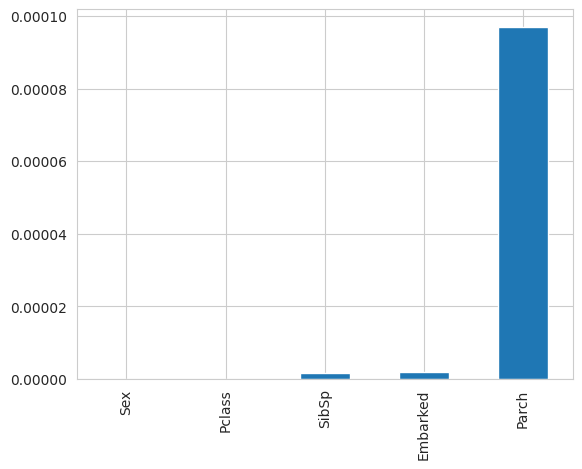

In [37]:
#smaller the pvalue , greter the predictive power
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')